In [23]:
import numpy as np
import matplotlib.animation as animation
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp
import scienceplots
from IPython.display import HTML


# Estilo
plt.style.use(['seaborn', 'science', 'nature','no-latex'])
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'

C:\Users\diver\AppData\Local\Temp\ipykernel_28008\2934397635.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn', 'science', 'nature','no-latex'])


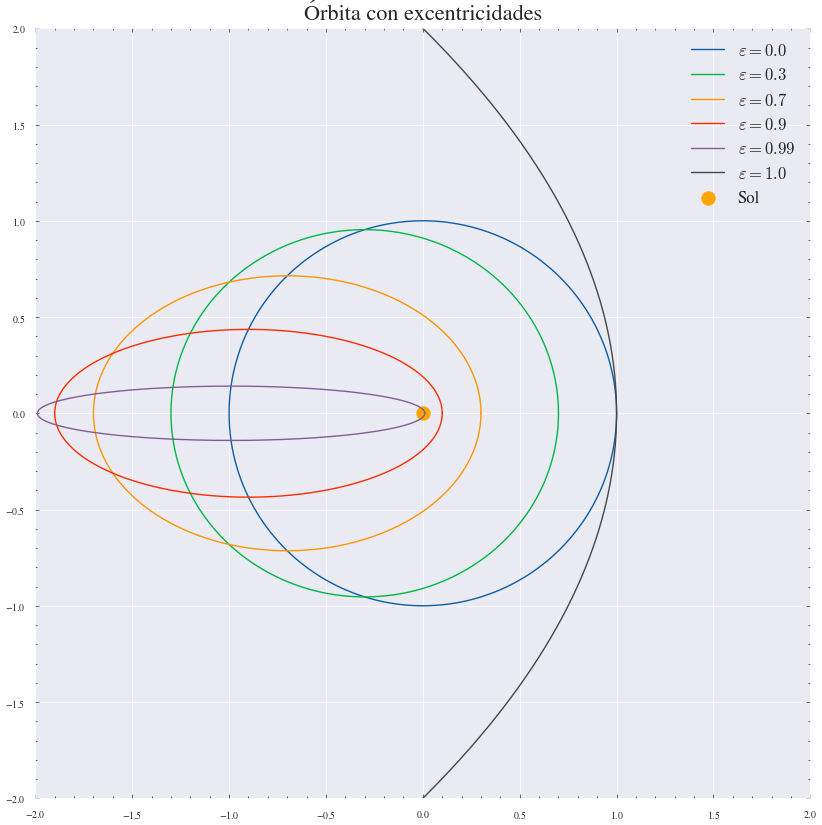

In [30]:
# Lista con valores de la excentricidad
excentricidades = [0.0, 0.3, 0.7, 0.9, 0.99]
plt.figure(figsize=(10, 10))

# Recorrido de la lista
for e in excentricidades:
    # Parámetros de la órbita
    a = 1.0  # Semieje mayor

    # Cálculo del semieje menor (b)
    b = a * np.sqrt(1 - e**2)

    # Ángulos para el rango de 0 a 2*pi
    theta = np.linspace(0, 2*np.pi, 1000)

    # Coordenadas polares
    r = a * (1 - e**2) / (1 + e * np.cos(theta))

    # Conversión a coordenadas cartesianas
    x = r * np.cos(theta)
    y = r * np.sin(theta)

    # Gráfica de la órbita
    plt.plot(x, y, label=f'$\\varepsilon = {e}$')

# Trayectoria parabólica
theta = np.linspace(0, 2*np.pi, 1000)
r = 2 * a / (1 + np.cos(theta))
x = r * np.cos(theta)
y = r * np.sin(theta)
plt.plot(x, y, label=r'$\varepsilon = 1.0$')

# Planeta
plt.scatter(0, 0, s=100, c='orange', label='Sol')
    
plt.title(f'Órbita con excentricidades', fontsize=16)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.grid(True)
plt.legend(fontsize=12)
# plt.axis('equal')  # Para que los ejes tengan la misma escala
plt.show()


MovieWriter ffmpeg unavailable; using Pillow instead.


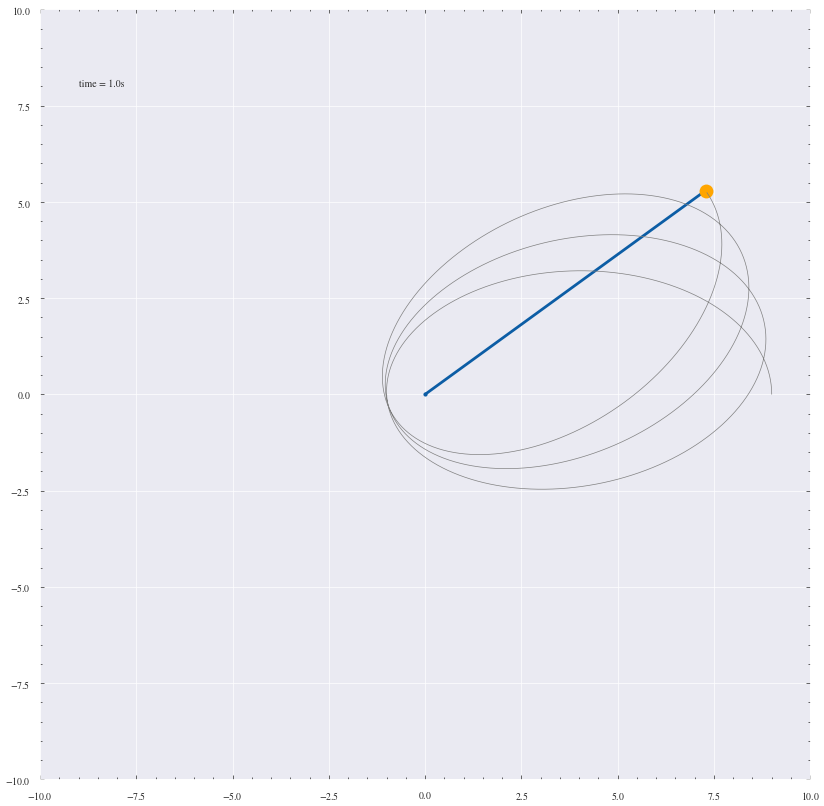

In [53]:
# Precesion del perihelio de Mercurio

# Constantes
def pos(t, a, b, vtheta, vphi):
    x = (np.sqrt(a**2 - b**2) + a*np.cos(2*np.pi*vtheta*t)) * np.cos(2*np.pi*vphi*t) - b * np.sin(2*np.pi*vtheta*t) * np.sin(2*np.pi*vphi*t)
    y = (np.sqrt(a**2 - b**2) + a*np.cos(2*np.pi*vtheta*t)) * np.sin(2*np.pi*vphi*t) + b * np.sin(2*np.pi*vtheta*t) * np.cos(2*np.pi*vphi*t)

    return x, y

# Parámetros de la órbita
a = 5.0  # Semieje mayor
b = 3.0  # Semieje menor
vtheta = 3.0  # Velocidad angular en theta
vphi = 0.10  # Velocidad angular en phi

# Condiciones iniciales
t0 = 0.0  # Tiempo inicial
tf = 1.0  # Tiempo final

# Trayectoria
t = np.linspace(t0, tf, 1000)
x, y = pos(t, a, b, vtheta, vphi)

# Animación
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-10, 10), ylim=(-10, 10))
ax.set_aspect('equal')

line, = ax.plot([], [], 'o-', lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)
mercury, = ax.plot([], [], 'o', c='orange', ms=10)
trace, = ax.plot([], [], '-', c='gray', lw=0.5)

def init():
    line.set_data([], [])
    time_text.set_text('')
    mercury.set_data([], [])
    trace.set_data([], [])
    return line, time_text

def animate(i):
    thisx = [0, x[i]]
    thisy = [0, y[i]]

    line.set_data(thisx, thisy)
    time_text.set_text(time_template % (i*tf/1000))
    mercury.set_data(x[i], y[i])
    trace.set_data(x[:i], y[:i])
    return line, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(t)),
                                interval=25, blit=True, init_func=init)

ani.save('precesion.gif', fps=len(t)/tf)


MovieWriter imagemagick unavailable; using Pillow instead.


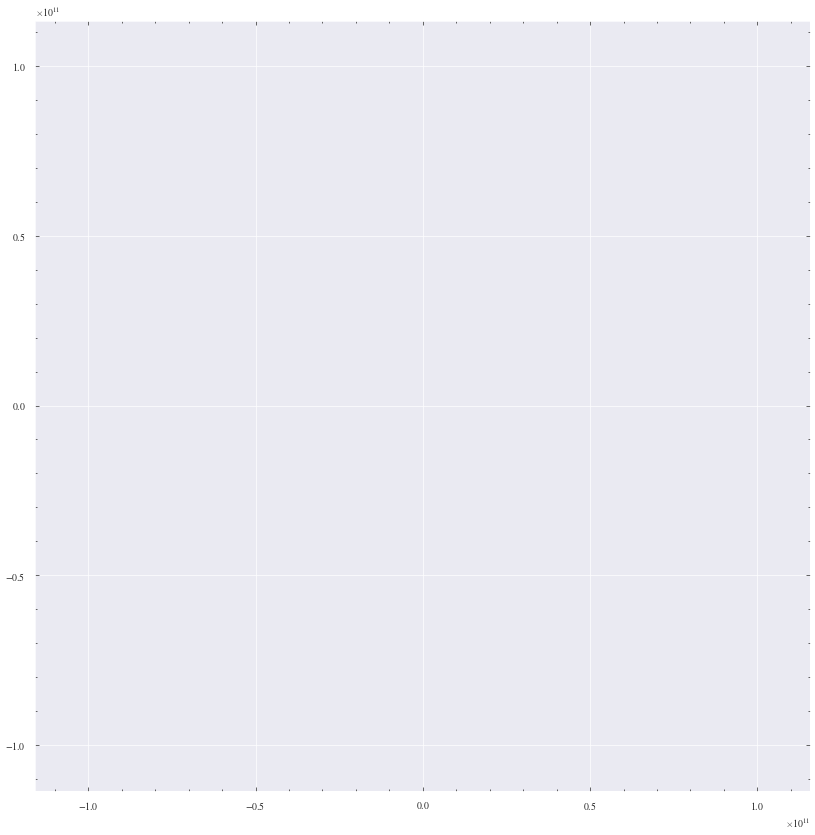

In [45]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

# Constantes
G = 6.67430e-11
M = 1.9885e30

# Parámetros de la órbita de Mercurio
a = 0.38709893 * 149.6e9
e = 0.20563069
b = a * np.sqrt(1 - e**2)
T = 0.2408467 * 365.25 * 24 * 3600
omega = 0.46669835

# Cálculo de la posición de Mercurio en su órbita
def position(t, a, b, omega):
    r = (a * (1 - e**2)) / (1 + e * np.cos(omega * t))
    x = r * np.cos(omega * t)
    y = r * np.sin(omega * t)
    return x, y

# Creación de la figura y los ejes
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(xlim=(-a*2, a*2), ylim=(-b*2, b*2))

# Lista para guardar las posiciones de Mercurio
xdata, ydata = [], []

# Creación del objeto que representa a Mercurio
mercury, = ax.plot([], [], 'o', color='gray')

# Linea de la órbita
x, y = position(np.linspace(0, T, 30000), a, b, omega)
orbit, = ax.plot(x, y, '--', color='gray')

# Función de inicialización de la animación
def init():
    mercury.set_data([], [])
    orbit.set_data([], [])
    xdata, ydata = [], []
    return mercury, orbit

# Función de animación
def animate(i):
    x, y = position(i, a, b, omega)
    mercury.set_data(x, y)
    orbit.set_data(x, y)
    xdata.append(x)
    ydata.append(y)
    # Ver trazo de la órbita
    orbit.set_data(xdata, ydata)
    return mercury, orbit

# Creación de la animación
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=np.arange(0, T, T/100), interval=40)

# Guardado de la animación
anim.save('mercury.gif', writer='imagemagick', fps=len(np.arange(0, T, T/100))/10)


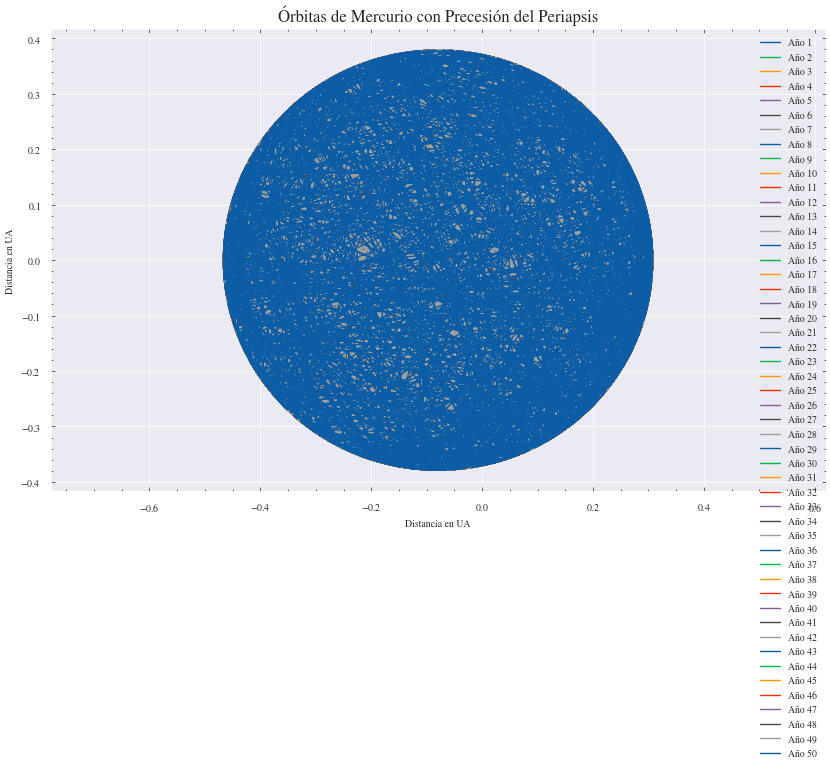

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes físicas
G = 6.67430e-11  # Constante gravitacional (m^3/kg/s^2)
M_sun = 1.989e30  # Masa del Sol (kg)
a_mercury = 0.387  # Semieje mayor de Mercurio en UA
e_mercury = 0.2056  # Excentricidad de la órbita de Mercurio
periapsis_mercury = a_mercury * (1 - e_mercury)  # Periapsis de Mercurio en UA
c = 63197.8  # Velocidad de la luz en UA/yr

# Función para calcular la precesión del periapsis de Mercurio en radianes por año
def precession(t):
    r = periapsis_mercury / (1 - e_mercury * np.cos(t))
    return (3 * G * M_sun) / (c**2 * r**2)

# Parámetros para el gráfico
years = np.linspace(0, 100, 1000)  # Años desde el inicio
precession_rate = precession(years * 2 * np.pi)  # Precesión en radianes por año

# Crear múltiples órbitas
num_orbits = 50
theta = np.linspace(0, 2 * np.pi * num_orbits, 1000)

plt.figure(figsize=(10, 6))

for i in range(num_orbits):
    # Aplicar la precesión al ángulo de la órbita
    theta_shifted = theta + i * precession_rate

    # Coordenadas polares
    r = a_mercury * (1 - e_mercury**2) / (1 + e_mercury * np.cos(theta_shifted))

    # Conversión a coordenadas cartesianas
    x = r * np.cos(theta_shifted)
    y = r * np.sin(theta_shifted)

    # Graficar la órbita
    plt.plot(x, y, label=f'Año {i + 1}')

plt.title('Órbitas de Mercurio con Precesión del Periapsis')
plt.xlabel('Distancia en UA')
plt.ylabel('Distancia en UA')
plt.grid(True)
plt.legend(loc='upper right')
plt.axis('equal')
plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


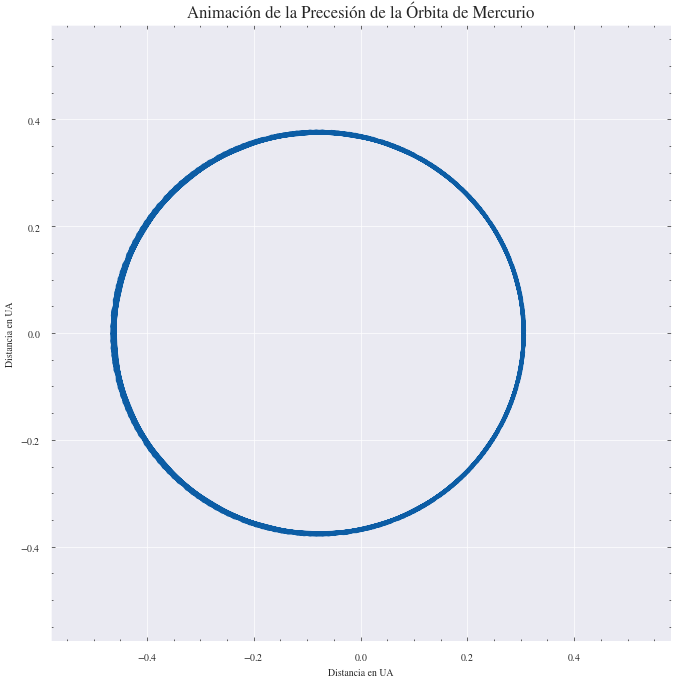

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Constantes físicas
G = 6.67430e-11  # Constante gravitacional (m^3/kg/s^2)
M_sun = 1.989e30  # Masa del Sol (kg)
a_mercury = 0.387  # Semieje mayor de Mercurio en UA
e_mercury = 0.2056  # Excentricidad de la órbita de Mercurio
periapsis_mercury = a_mercury * (1 - e_mercury)  # Periapsis de Mercurio en UA
c = 63197.8  # Velocidad de la luz en UA/yr

# Función para calcular la precesión del periapsis de Mercurio en radianes por año
def precession(t):
    r = periapsis_mercury / (1 - e_mercury * np.cos(t))
    return (3 * G * M_sun) / (c**2 * r**2)

# Parámetros para la animación
num_frames = 200
num_orbits = 10
theta = np.linspace(0, 2 * np.pi * num_orbits, num_frames)

fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-a_mercury * 1.5, a_mercury * 1.5)
ax.set_ylim(-a_mercury * 1.5, a_mercury * 1.5)
orbit_line, = ax.plot([], [], lw=2)

# Función de inicialización
def init():
    orbit_line.set_data([], [])
    return orbit_line,

# Función de animación
def animate(i):
    theta_shifted = theta + i * precession(i * 2 * np.pi / num_frames)
    r = a_mercury * (1 - e_mercury**2) / (1 + e_mercury * np.cos(theta_shifted))
    x = r * np.cos(theta_shifted)
    y = r * np.sin(theta_shifted)
    orbit_line.set_data(x, y)
    return orbit_line,

# Crear la animación
ani = FuncAnimation(fig, animate, frames=num_frames, init_func=init, blit=True)

plt.title('Animación de la Precesión de la Órbita de Mercurio')
plt.xlabel('Distancia en UA')
plt.ylabel('Distancia en UA')
plt.grid(True)
plt.axis('equal')

# Guardar la animación
ani.save('precession.gif', writer='imagemagick', fps=120)